In [29]:
# Downloading our library 
import os
directory = "seminar-dlmb-2025-winter-public"

if os.path.exists(directory) and os.listdir(directory):
    print(f"Directory {directory} exists and is non-empty.")
else:
    print(f"Directory {directory} does not exist or is empty.")
    !!git clone https://github.com/hzi-bifo/seminar-dlmb-2025-winter-public.git


Directory seminar-dlmb-2025-winter-public does not exist or is empty.


In [30]:
%pip install biopython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [31]:
import sys
sys.path.append('seminar-dlmb-2025-winter-public/src/')
# from utility.file_utility import FileUtility
from amr.amr_utility import get_seq_label_fold, get_seq_label_simple, get_seq_label_hard

# Loading easy dataset
ds = get_seq_label_simple("Staphylococcus_aureus_cefoxitin_pbp4")
# a = {l : [(s[0:3]+'...', ll) for s, ll in seq_labels] for l, seq_labels in a.items()} # only prints first 3 letters of each sequence
# print(f"Easy dataset: { {l : len(seqs) for l, seqs in ds.items()} }")

seq_train = [x[0] for x in ds["train"]]
y_train = [x[1] for x in ds["train"]]

seq_test = [x[0] for x in ds["test"]]
y_test = [x[1] for x in ds["test"]]


In [32]:
print('Num of samples in train data: {}'.format(len(seq_train)))
print('Num of samples in test data: {}'.format(len(seq_test)))


Num of samples in train data: 800
Num of samples in test data: 99


In [33]:
print('Input of the first element:\n{}'.format(seq_train[0]))
print('First label: {} -> resistant'.format(y_train[0]))

print('Input of the 26th element:\n{}'.format(seq_train[26]))
print('26th label: {} -> resistant'.format(y_train[26]))


Input of the first element:
ATGAAAAATTTAATATCTATTATCATCATTTTATGTTTAACATTAAGTATTATGACACCATATGCACAAGCTACTAACAGTGACGTAACCCCTGTACAAGCAGCAAATCAATATGGTTATGCAGGTTTGTCGGCTGCATACGAACCGACGAGTGCTGTTAATGTAAGTCAAACTGGACAATTACTGTATCAATACAATATCGATACTAAGTGGAATCCAGCGTCTATGACTAAATTAATGACAATGTACTTAACATTGGAAGCTGTAAATAAGGGGCAGCTTTCACTTGATGACACAGTCACAATGACGAACAAAGAATATATTATGTCTACACTACCTGAGTTGAGTAATACGAAACTATATCCTGGACAAGTATGGACAATCGCAGACCTATTACAAATTACAGTATCTAATTCTAGTAATGCCGCGGCATTAATTTTAGCTAAGAAGGTATCAAAAAACACCAGCGATTTCGTTGATTTAATGAATAACAAAGCTAAAGCTATCGGAATGAAAAATACACATTTCGTCAATCCAACGGGTGCTGAAAATTCAAGATTACGTTCATTTGCACCAACAAAGTATAAAGACCAAGAACGTACTGTAACGACTGCTAGAGACTATGCCATTTTAGATTTACACGTGATTAAAGAGACACCTAAAATATTAGACTTTACAAAGCAGTTAGCACCAACAACGCATGCAGTTACGTATTACACATTCAACTTTTCATTGGAAGGTGCAAAAATGAGTTTGCCTGGTACAGATGGTTTAAAAACTGGATCAAGTGATACAGCAAATTACAACCATACGATTACTACCAAACGAGGTAAATTTAGAATTAATCAAGTTATCATGGGTGCGGGAGACTATAAAAACCTTGGTGGCGAGAAGCAACGTAATATGATGGGGAATGCATTAATGGAACGCTCATTTGATCAGTATAAATATGTAAAAATATTGTCTAAAGGT

Differences between the first and 26th sequences:
72:A/G 164:A/T 564:T/A 581:G/A 623:T/C 821:C/T 863:G/A 929:C/T 1010:C/T 1157:T/C 1192:C/A 1250:T/A 
Number of non-duplicate pairs: 522048 (Number of duplicate pairs: 117952)


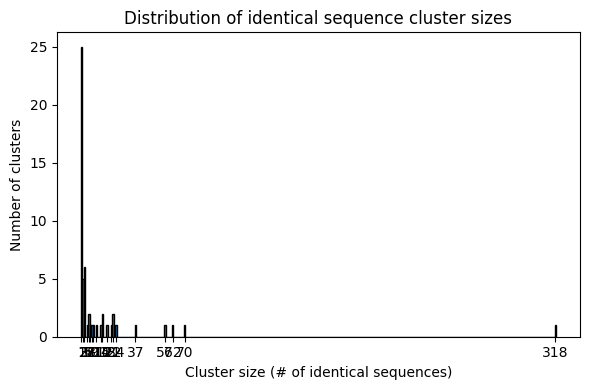

In [ ]:
print('Differences between the first and 26th sequences:')
for i, (a, b) in enumerate(zip(seq_train[0], seq_train[26])):
    if a != b:
        print(f"{i}:{a}/{b}", end=' ')
print()

dup_count, all_count = 0, 0
for s1 in seq_train:
    for s2 in seq_train:
        dup_count += s1 == s2
        all_count += 1
print('Number of non-duplicate pairs: {} (Number of duplicate pairs: {})'.format(all_count - dup_count, dup_count))

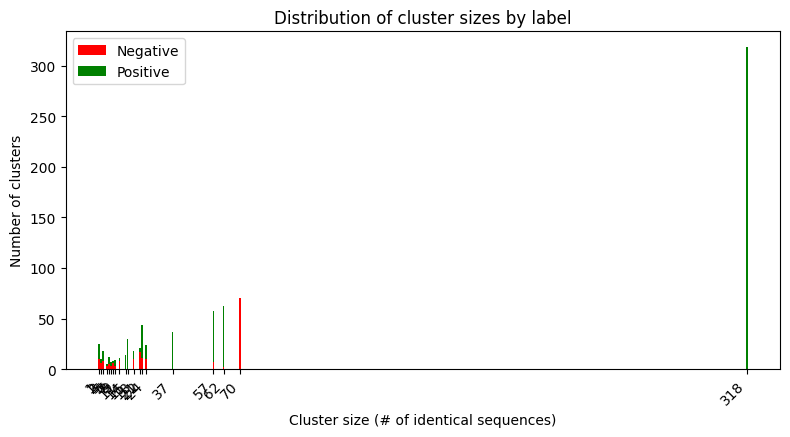

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Put into DataFrame
df = pd.DataFrame({'seq': seq_train, 'label': y_train})

# count labels inside each cluster
counts = df.groupby(['seq', 'label']).size().unstack(fill_value=0)
counts['total'] = counts.sum(axis=1)

# group by cluster size
size_summary = counts.groupby('total').sum().sort_index()

pos = size_summary.get(1, pd.Series(0, index=size_summary.index))
neg = size_summary.get(0, pd.Series(0, index=size_summary.index))

plt.figure(figsize=(8,5))
plt.bar(size_summary.index, neg, label='Negative', color='red')
plt.bar(size_summary.index, pos, bottom=neg, label='Positive', color='green')

plt.xlabel("Cluster size (# of identical sequences)")
plt.ylabel("Number of clusters")
plt.title("Distribution of cluster sizes by label")
plt.xticks(size_summary.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # extra margin if needed
plt.show()

In [36]:
import seaborn as sns
import numpy as np

Median and mean sequence length: 1296.0, 1296.0


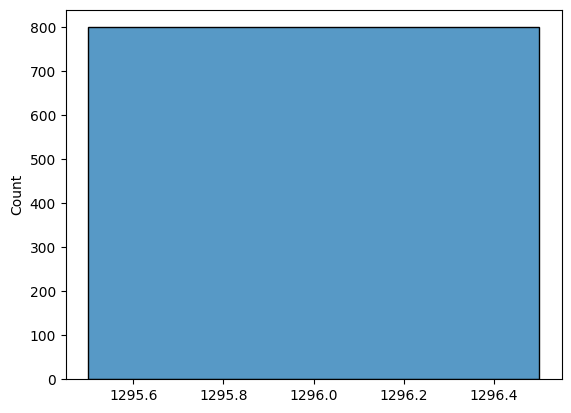

In [37]:
len_train = [len(s) for s in seq_train]
sns.histplot(len_train)
median = np.median(len_train)
mean = np.mean(len_train)
print('Median and mean sequence length: {}, {}'.format(median, mean))

In [38]:
uniq_vals = set(y_train)
y_train_int = list(map(int, y_train))
print('Labels in training data')
print('Non resistant: {}'.format(y_train_int.count(0)))
print('Resistant: {}'.format(y_train_int.count(1)))

Labels in training data
Non resistant: 179
Resistant: 621


In [39]:
uniq_vals = set(y_test)
y_test_int = list(map(int, y_test))
print('Labels in test data')
print('Non resistant: {}'.format(y_test_int.count(0)))
print('Resistant: {}'.format(y_test_int.count(1)))

Labels in test data
Non resistant: 21
Resistant: 78
